## Import all the libraries : 
 install xgboost, shap

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=2.2)
plt.style.use('seaborn')

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split, ShuffleSplit
from sklearn.metrics import f1_score
import itertools
import xgboost as xgb
from xgboost import XGBClassifier
import shap
from tqdm import tqdm
import warnings 
warnings.filterwarnings('ignore')
import time

In [2]:
df_train = pd.read_csv('train_p.csv')
df_test = pd.read_csv('test_p.csv')

# Model build up using XGBClassifier

In [3]:
df_train.head()

,Unnamed: 0,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,...,new_paredmad_x_pisomadera_x_techozinc,new_paredmad_x_pisomadera_x_techoentrepiso,new_paredmad_x_pisomadera_x_techootro,new_paredzinc_x_pisomoscer_x_techozinc,new_paredzinc_x_pisocemento_x_techozinc,new_paredzinc_x_pisonotiene_x_techozinc,new_paredzinc_x_pisomadera_x_techozinc,new_paredfibras_x_pisomoscer_x_techozinc,new_paredfibras_x_pisocemento_x_techozinc,new_paredother_x_pisocemento_x_techozinc
0,0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,...,1,0,0,0,0,0,0,0,0,0
2,2,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,...,0,0,0,0,0,0,0,0,0,0
4,4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Labels for training
train_labels = np.array(df_train['Target'])
train_labels

array([4, 4, 4, ..., 2, 2, 2])

In [5]:
df_train.columns

Index(['Unnamed: 0', 'Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a',
       'refrig', 'v18q', 'v18q1',
       ...
       'new_paredmad_x_pisomadera_x_techozinc',
       'new_paredmad_x_pisomadera_x_techoentrepiso',
       'new_paredmad_x_pisomadera_x_techootro',
       'new_paredzinc_x_pisomoscer_x_techozinc',
       'new_paredzinc_x_pisocemento_x_techozinc',
       'new_paredzinc_x_pisonotiene_x_techozinc',
       'new_paredzinc_x_pisomadera_x_techozinc',
       'new_paredfibras_x_pisomoscer_x_techozinc',
       'new_paredfibras_x_pisocemento_x_techozinc',
       'new_paredother_x_pisocemento_x_techozinc'],
      dtype='object', length=517)

In [6]:
# Extract the training data
train_set = df_train.drop(columns = ['Unnamed: 0','Id','idhogar', 'Target', 'edjefe', 'edjefa'])

In [7]:
train_set.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,new_paredmad_x_pisomadera_x_techozinc,new_paredmad_x_pisomadera_x_techoentrepiso,new_paredmad_x_pisomadera_x_techootro,new_paredzinc_x_pisomoscer_x_techozinc,new_paredzinc_x_pisocemento_x_techozinc,new_paredzinc_x_pisonotiene_x_techozinc,new_paredzinc_x_pisomadera_x_techozinc,new_paredfibras_x_pisomoscer_x_techozinc,new_paredfibras_x_pisocemento_x_techozinc,new_paredother_x_pisocemento_x_techozinc
0,190000.0,0,3,0,1,1,0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,135000.0,0,4,0,1,1,1,1.0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,0.0,0,8,0,1,1,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,180000.0,0,5,0,1,1,1,1.0,0,2,...,0,0,0,0,0,0,0,0,0,0
4,180000.0,0,5,0,1,1,1,1.0,0,2,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_set, train_labels, test_size = 0.20, random_state = 20)

In [9]:
x_train.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,new_paredmad_x_pisomadera_x_techozinc,new_paredmad_x_pisomadera_x_techoentrepiso,new_paredmad_x_pisomadera_x_techootro,new_paredzinc_x_pisomoscer_x_techozinc,new_paredzinc_x_pisocemento_x_techozinc,new_paredzinc_x_pisonotiene_x_techozinc,new_paredzinc_x_pisomadera_x_techozinc,new_paredfibras_x_pisomoscer_x_techozinc,new_paredfibras_x_pisocemento_x_techozinc,new_paredother_x_pisocemento_x_techozinc
8182,90000.0,0,4,0,1,1,0,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0
8364,0.0,0,6,0,1,1,1,1.0,0,2,...,0,0,0,0,0,0,0,0,0,0
7759,0.0,0,6,0,1,1,1,1.0,1,2,...,0,0,0,0,0,0,0,0,0,0
1957,160000.0,0,5,0,1,1,0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3736,0.0,0,2,0,0,1,0,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
cmodel = XGBClassifier(booster='gbtree', objective='multi:softmax')
cmodel.fit(x_train, y_train)

[07:13:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=64, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [11]:
from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(cmodel, x_test, y_test)

Accuracy: 93.04%


0.930439330543933

In [12]:
from sklearn import metrics
y_pred = cmodel.predict(x_test)
predictions = [round(value) for value in y_pred]
print(metrics.confusion_matrix(y_test, predictions))

[[ 130   10    1   12]
 [   8  274   12   22]
 [   1   14  194   35]
 [   2    8    8 1181]]


In [13]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           1      0.922     0.850     0.884       153
           2      0.895     0.867     0.881       316
           3      0.902     0.795     0.845       244
           4      0.945     0.985     0.964      1199

    accuracy                          0.930      1912
   macro avg      0.916     0.874     0.894      1912
weighted avg      0.929     0.930     0.929      1912



## What if we change the training - test_size = 0.50

In [14]:
from sklearn.model_selection import train_test_split
x_train_half, x_test_half, y_train_half, y_test_half = train_test_split(train_set, train_labels, test_size = 0.50, random_state = 20)

In [15]:
cmodel_half = XGBClassifier(booster='gbtree', objective='multi:softmax')
cmodel_half.fit(x_train_half, y_train_half)

[07:13:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=64, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [16]:
calculate_accuracy(cmodel_half, x_test_half, y_test_half)

Accuracy: 88.70%


0.8870056497175142

In [17]:
from sklearn import metrics
y_pred_half = cmodel_half.predict(x_test_half)
predictions_half = [round(value) for value in y_pred_half]
print(metrics.confusion_matrix(y_test_half, predictions_half))

[[ 296   37   15   62]
 [  15  618   27  135]
 [   0   43  408  132]
 [  12   33   29 2917]]


In [18]:
print(metrics.classification_report(y_test_half, y_pred_half, digits=3))

              precision    recall  f1-score   support

           1      0.916     0.722     0.808       410
           2      0.845     0.777     0.810       795
           3      0.852     0.700     0.768       583
           4      0.899     0.975     0.935      2991

    accuracy                          0.887      4779
   macro avg      0.878     0.794     0.830      4779
weighted avg      0.886     0.887     0.883      4779



## test_size = 0.10

In [19]:
from sklearn.model_selection import train_test_split
x_train_nine, x_test_nine, y_train_nine, y_test_nine = train_test_split(train_set, train_labels, test_size = 0.10, random_state = 20)

In [20]:
cmodel_nine = XGBClassifier(booster='gbtree', objective='multi:softmax')
cmodel_nine.fit(x_train_nine, y_train_nine)

[07:13:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=64, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [21]:
calculate_accuracy(cmodel_nine, x_test_nine, y_test_nine)

Accuracy: 94.04%


0.9403765690376569

In [22]:
from sklearn import metrics
y_pred_nine = cmodel_nine.predict(x_test_nine)
predictions_nine = [round(value) for value in y_pred_nine]
print(metrics.confusion_matrix(y_test_nine, predictions_nine))

[[ 60   5   0   4]
 [  3 146   9  11]
 [  0   4 103  14]
 [  2   3   2 590]]


In [23]:
print(metrics.classification_report(y_test_nine, y_pred_nine, digits=3))

              precision    recall  f1-score   support

           1      0.923     0.870     0.896        69
           2      0.924     0.864     0.893       169
           3      0.904     0.851     0.877       121
           4      0.953     0.988     0.970       597

    accuracy                          0.940       956
   macro avg      0.926     0.893     0.909       956
weighted avg      0.940     0.940     0.939       956



## test_size = 0.05

In [24]:
from sklearn.model_selection import train_test_split
x_train_nf, x_test_nf, y_train_nf, y_test_nf = train_test_split(train_set, train_labels, test_size = 0.05, random_state = 20)

In [25]:
cmodel_nf = XGBClassifier(booster='gbtree', objective='multi:softmax')
cmodel_nf.fit(x_train_nf, y_train_nf)

[07:14:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=64, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [26]:
calculate_accuracy(cmodel_nf, x_test_nf, y_test_nf)

Accuracy: 94.35%


0.9435146443514645

In [27]:
from sklearn import metrics
y_pred_nf = cmodel_nine.predict(x_test_nf)
predictions_nf = [round(value) for value in y_pred_nf]
print(metrics.confusion_matrix(y_test_nf, predictions_nf))

[[ 25   2   0   1]
 [  2  70   3   4]
 [  0   1  60  12]
 [  2   2   1 293]]


In [28]:
print(metrics.classification_report(y_test_nf, y_pred_nf, digits=3))

              precision    recall  f1-score   support

           1      0.862     0.893     0.877        28
           2      0.933     0.886     0.909        79
           3      0.938     0.822     0.876        73
           4      0.945     0.983     0.964       298

    accuracy                          0.937       478
   macro avg      0.920     0.896     0.907       478
weighted avg      0.937     0.937     0.936       478



# Maybe the model is trained to better predict poverty level 4

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


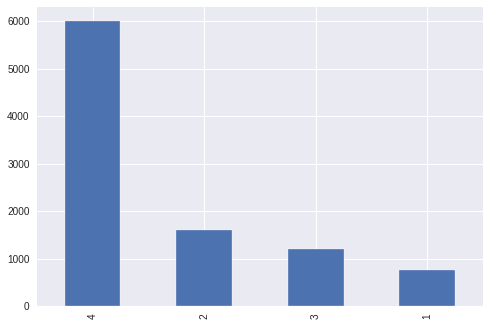

In [29]:
imbalance_check = df_train.Target.value_counts(normalize = False)
imbalance_check_plot = imbalance_check.plot(kind = 'bar')
print(imbalance_check)
print(imbalance_check_plot)

## Undersampling

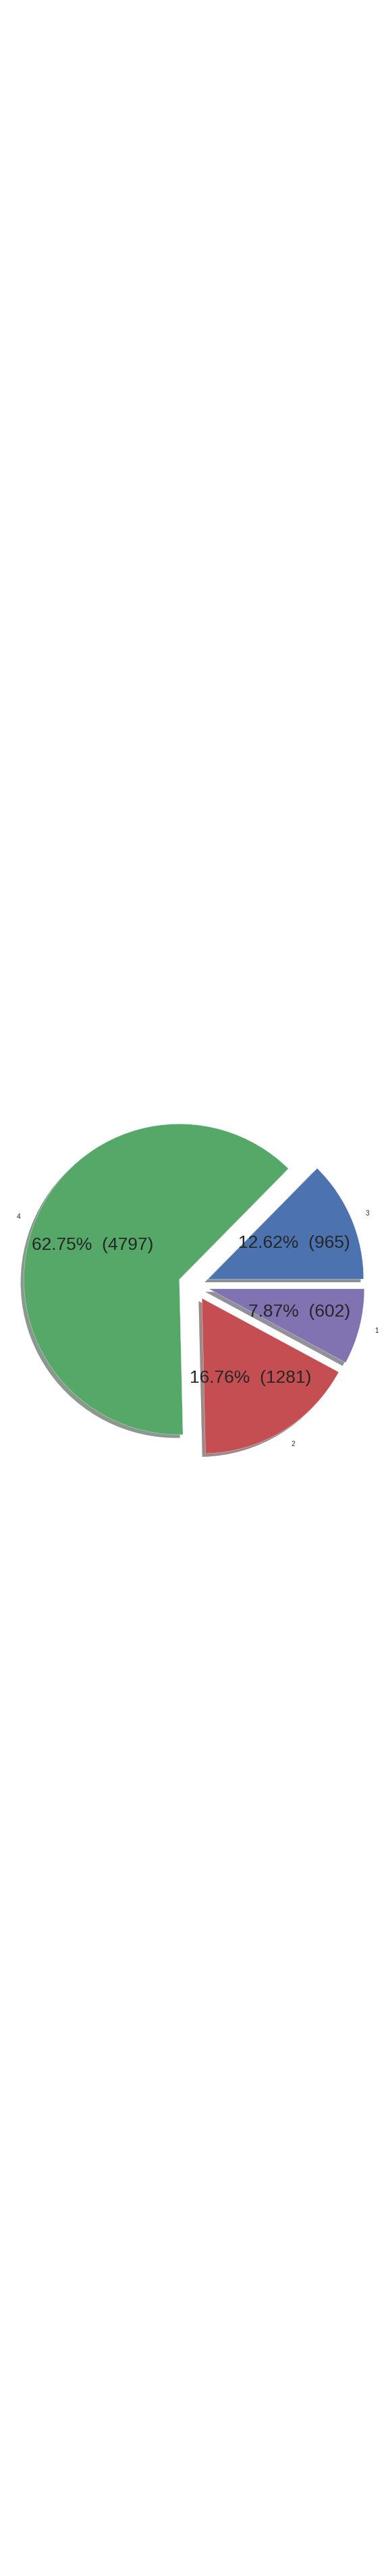

In [42]:
plot_pie(y_train)

balanced by over-sampling: 
 sampling_strategy={1: 602, 2: 602, 3: 602, 4: 602} 
 y: Counter({1: 602, 2: 602, 3: 602, 4: 602})


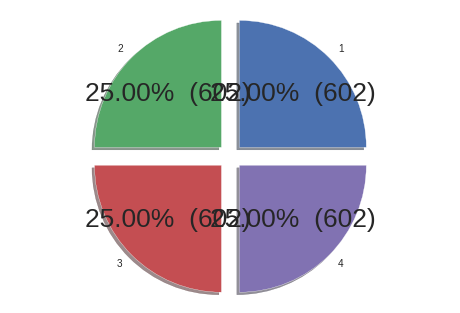

In [30]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

def plot_pie(y):
    target_stats = Counter(y)
    labels = list(target_stats.keys())
    sizes = list(target_stats.values())
    explode = tuple([0.1] * len(target_stats))

    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = int(round(pct * total / 100.0))
            return '{p:.2f}%  ({v:d})'.format(p=pct, v=val)
        return my_autopct

    fig, ax = plt.subplots()
    ax.pie(sizes, explode=explode, labels=labels, shadow=True,
           autopct=make_autopct(sizes))
    ax.axis('equal')

# UnderSampling (602개가 Minimum)
sampling_strategy = {1: 602, 2: 602, 3: 602, 4: 602}

rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
x_rus, y_rus = rus.fit_resample(x_train, y_train)
print('balanced by over-sampling: \n sampling_strategy={} \n y: {}'
      .format(sampling_strategy, Counter(y_rus)))
plot_pie(y_rus)

In [31]:
cmodel_rus = XGBClassifier(booster='gbtree', objective='multi:softmax')
cmodel_rus.fit(x_rus, y_rus)

[07:14:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=64, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
calculate_accuracy(cmodel_rus, x_test, y_test)

Accuracy: 76.88%


0.7688284518828452

In [33]:
from sklearn import metrics
y_pred_rus = cmodel_rus.predict(x_test)
predictions_rus = [round(value) for value in y_pred_rus]
print(metrics.confusion_matrix(y_test, predictions_rus))

[[145   4   0   4]
 [ 29 240  32  15]
 [  9  20 193  22]
 [ 39 117 151 892]]


In [34]:
print(metrics.classification_report(y_test, y_pred_rus, digits=3))

              precision    recall  f1-score   support

           1      0.653     0.948     0.773       153
           2      0.630     0.759     0.689       316
           3      0.513     0.791     0.623       244
           4      0.956     0.744     0.837      1199

    accuracy                          0.769      1912
   macro avg      0.688     0.811     0.730      1912
weighted avg      0.821     0.769     0.780      1912



## Oversampling

balanced by over-sampling: 
 sampling_strategy={1: 5996, 2: 5996, 3: 5996, 4: 5996} 
 y: Counter({3: 5996, 4: 5996, 2: 5996, 1: 5996})


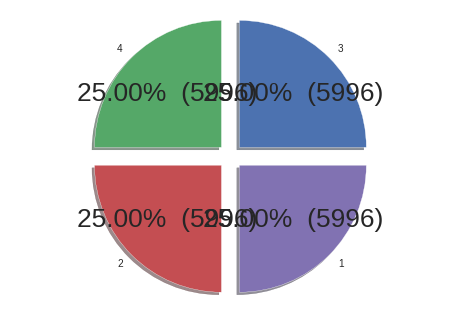

In [35]:
# OverSampling
sampling_strategy = {1: 5996, 2: 5996, 3: 5996, 4: 5996}

ros = RandomOverSampler(sampling_strategy=sampling_strategy)
x_ros, y_ros = ros.fit_resample(x_train, y_train)
print('balanced by over-sampling: \n sampling_strategy={} \n y: {}'
      .format(sampling_strategy, Counter(y_ros)))
plot_pie(y_ros)

In [36]:
cmodel_ros = XGBClassifier(booster='gbtree', objective='multi:softmax')
cmodel_ros.fit(x_ros, y_ros)

[07:14:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=64, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
calculate_accuracy(cmodel_ros, x_test, y_test)

Accuracy: 92.47%


0.9246861924686193

In [38]:
from sklearn import metrics
y_pred_ros = cmodel_ros.predict(x_test)
predictions_ros = [round(value) for value in y_pred_ros]
print(metrics.confusion_matrix(y_test, predictions_ros))

[[ 139    7    2    5]
 [   9  274   18   15]
 [   1   10  212   21]
 [   6   20   30 1143]]


In [39]:
print(metrics.classification_report(y_test, y_pred_ros, digits=3))

              precision    recall  f1-score   support

           1      0.897     0.908     0.903       153
           2      0.881     0.867     0.874       316
           3      0.809     0.869     0.838       244
           4      0.965     0.953     0.959      1199

    accuracy                          0.925      1912
   macro avg      0.888     0.899     0.893      1912
weighted avg      0.926     0.925     0.925      1912



## Tryout XAI here

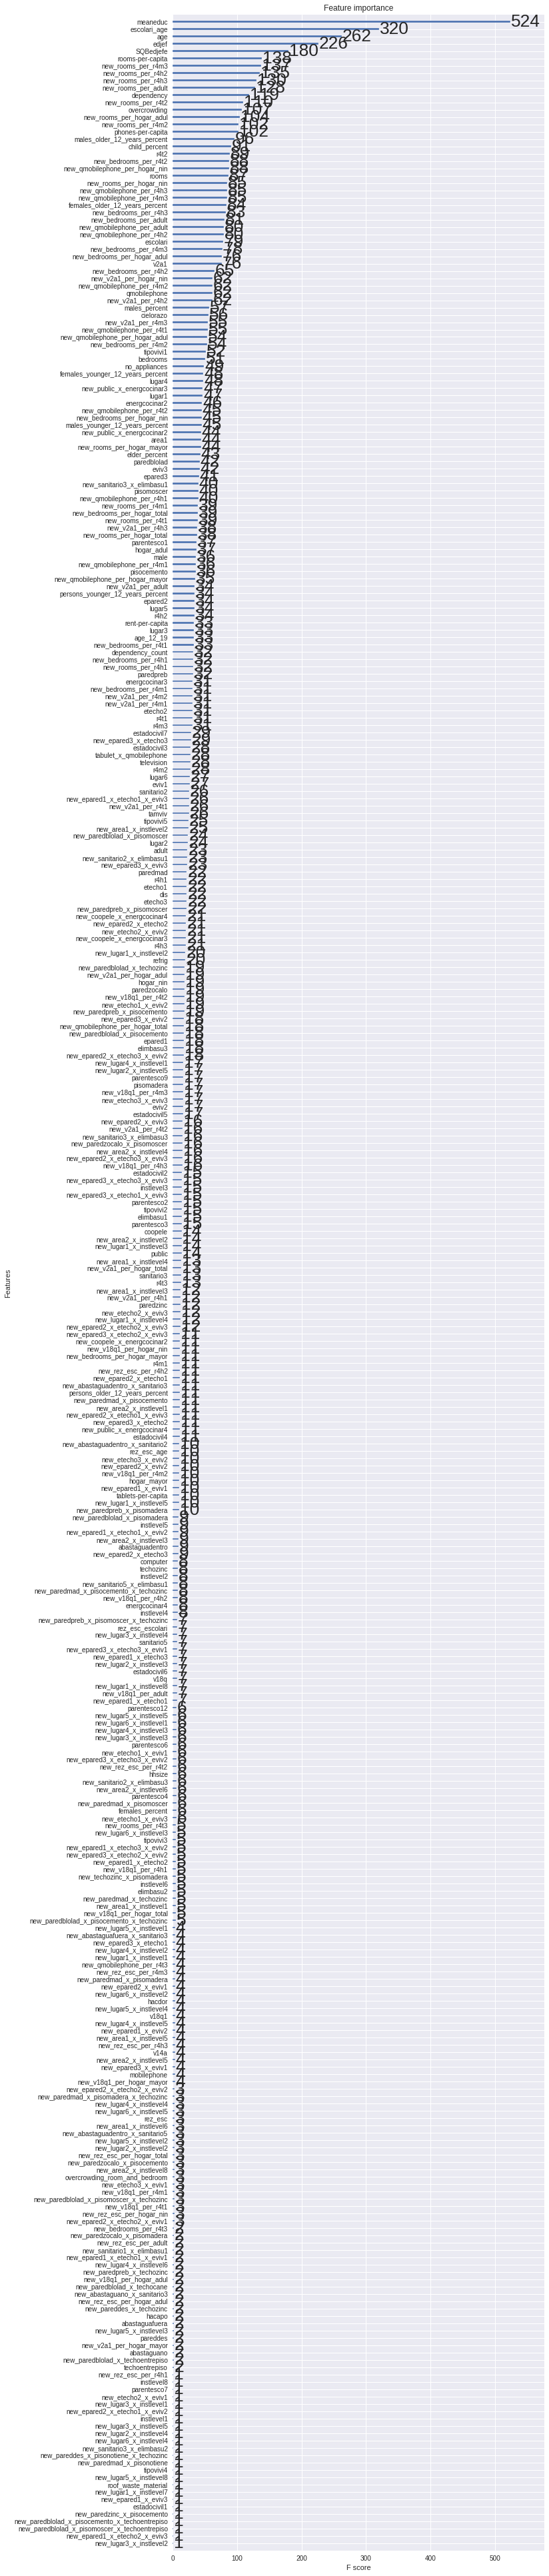

In [40]:
import xgboost
from matplotlib.pylab import rcParams

# RUS
rcParams['figure.figsize'] = 10,70
xgboost.plot_importance(cmodel_rus)

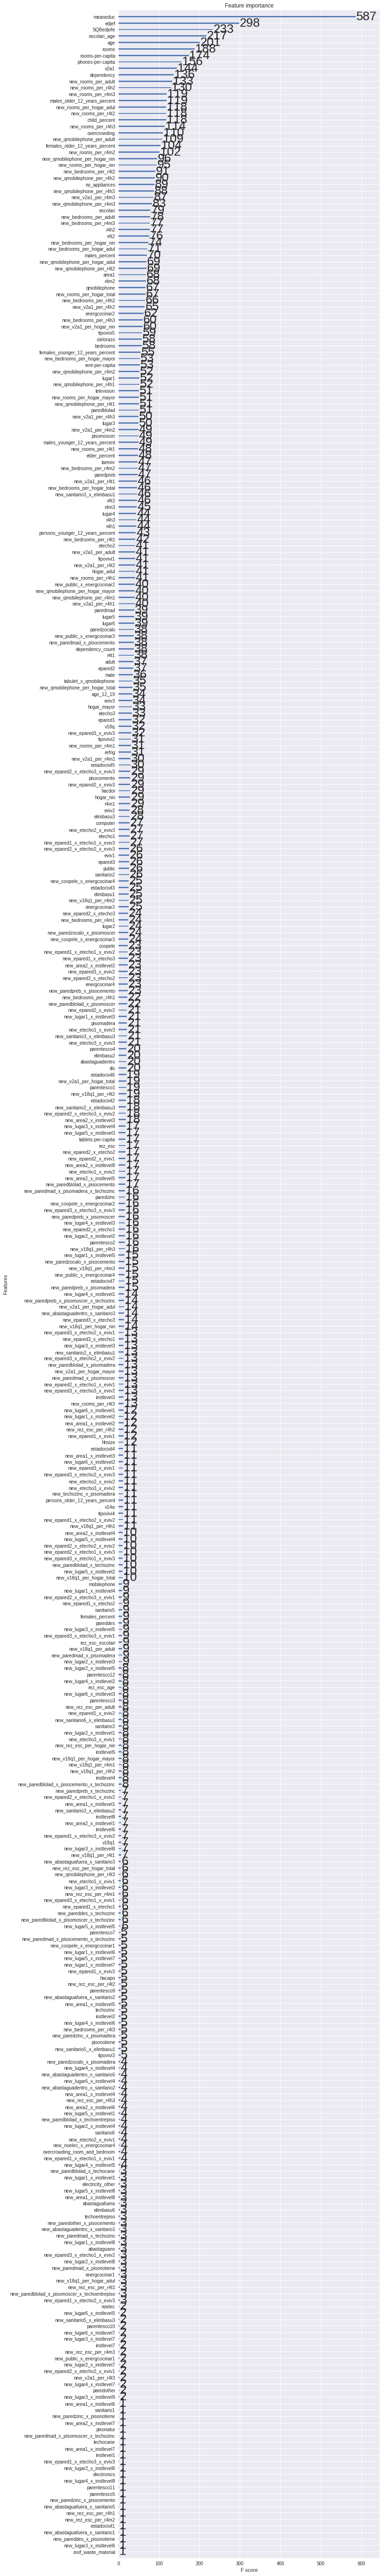

In [43]:
# ROS
rcParams['figure.figsize'] = 10,100
xgboost.plot_importance(cmodel_ros)

In [45]:
explainer = shap.TreeExplainer(cmodel_ros)
shap_values = explainer.shap_values(x_ros)
poverty1=shap_values[0]
poverty2=shap_values[1]
poverty3=shap_values[2]
poverty4=shap_values[3]

In [50]:
idx = 16
print(x_train.iloc[idx, :])

v2a1                                         0.0
hacdor                                       0.0
rooms                                        5.0
hacapo                                       0.0
v14a                                         1.0
                                            ... 
new_paredzinc_x_pisonotiene_x_techozinc      0.0
new_paredzinc_x_pisomadera_x_techozinc       0.0
new_paredfibras_x_pisomoscer_x_techozinc     0.0
new_paredfibras_x_pisocemento_x_techozinc    0.0
new_paredother_x_pisocemento_x_techozinc     0.0
Name: 4125, Length: 511, dtype: float64


In [51]:
shap.initjs()
#for poverty level 1
shap.force_plot(explainer.expected_value[0], poverty1[idx,:], x_train.iloc[idx,:])

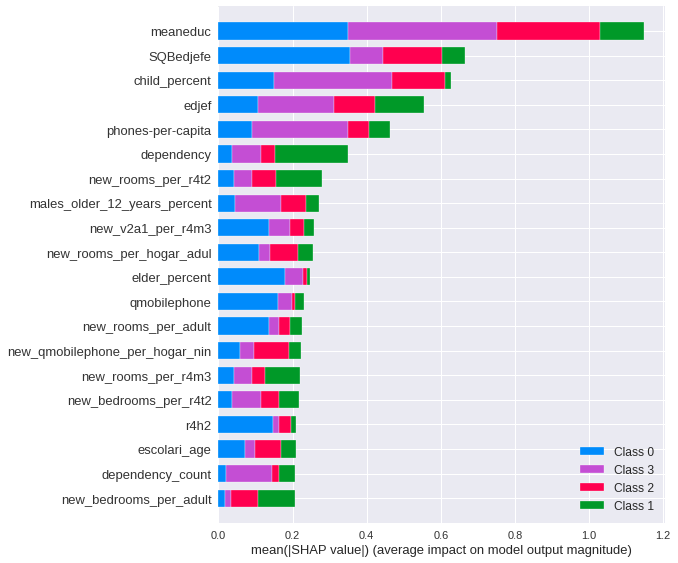

In [52]:
shap.summary_plot(shap_values, x_ros, plot_type="bar")

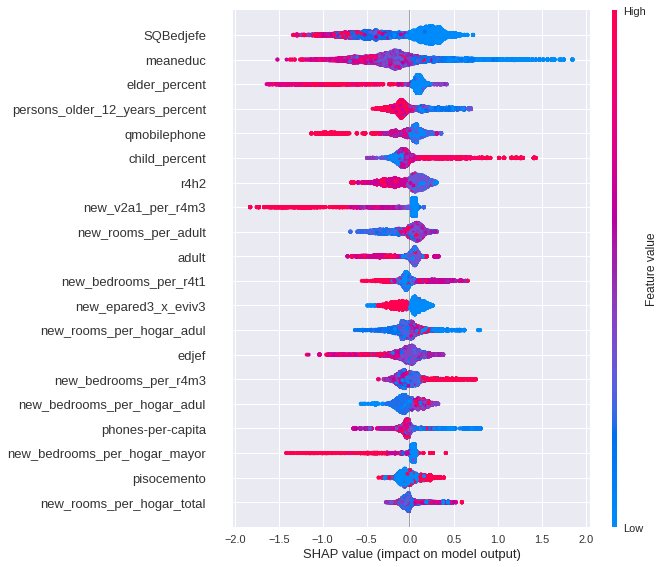

In [53]:
shap.summary_plot(shap_values[0], x_ros)